# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(pd.read_csv('states0.csv'))
print(pd.read_csv('states1.csv'))

# It appears that each .csv file has only some of the states. There are 10 files in total (0-9).

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   
5           5    Colorado   5278906   20.78%  69.90%   3.55%   0.57%   2.66%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  
5     NaN  $64,657.80     2648667M_2630239F  
   Unnamed: 0                 State  TotalPop Hispanic   White   Black Native  \
0           0              Colorado 

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [2]:
import glob
all_files = glob.glob('states[0-9].csv')
states_list = []
for filename in all_files:
    data = pd.read_csv(filename)
    states_list.append(data)
    
us_census = pd.concat(states_list)
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607M_1841615F
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413M_478041F
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674M_340810F


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [3]:
print(us_census.columns)
print(us_census.dtypes)
# I will want the race/ethnicity and income as integers
# I will want gender population as integers too - I will need to separate males and females as well

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [4]:
# no need to print again

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [5]:
split_income = us_census['Income'].str.split('[\$,]')
income = split_income.str.get(1) + split_income.str.get(2)
us_census['Income'] = pd.to_numeric(income)

print(us_census.dtypes)
us_census.head()

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [6]:
genderpop_split = us_census['GenderPop'].str.split('[MF_]')
print(genderpop_split.head())
us_census['Male Population'] = pd.to_numeric(genderpop_split.str.get(0))
us_census['Female Population'] = pd.to_numeric(genderpop_split.str.get(2))
us_census = us_census.drop(columns=['GenderPop'])
print(us_census.dtypes) # For some reason the female population became float instead of int - not sure why but it shouldn't affect anything
print(us_census.head())

0      [2341093, , 2489527, ]
1        [384160, , 349215, ]
2      [3299088, , 3342840, ]
3      [1451913, , 1506295, ]
4    [19087135, , 19334329, ]
Name: GenderPop, dtype: object
Unnamed: 0             int64
State                 object
TotalPop               int64
Hispanic              object
White                 object
Black                 object
Native                object
Asian                 object
Pacific               object
Income               float64
Male Population        int64
Female Population    float64
dtype: object
   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [7]:
# did this in the previous step

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

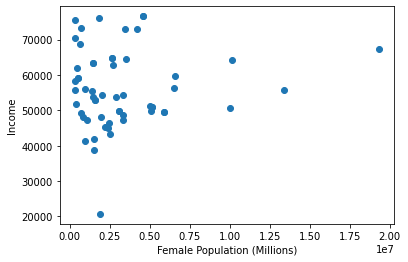

In [8]:
plt.scatter(us_census['Female Population'],us_census['Income'])
plt.xlabel('Female Population (Millions)')
plt.ylabel('Income')
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [9]:
print(us_census['Female Population'].isna().value_counts())
print(us_census['Male Population'].isna().value_counts())

# The male population has no nan entries. 
# Therefore I can use TotalPop and Male Population to determine what the female population actually is

us_census = us_census.fillna(value={'Female Population':us_census['TotalPop']-us_census['Male Population']})
# Checking to see if all nans were filled
print(us_census['Female Population'].isna().value_counts())

False    57
True      3
Name: Female Population, dtype: int64
False    60
Name: Male Population, dtype: int64
False    60
Name: Female Population, dtype: int64


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [10]:
# For some reason using .duplicated() shows that there are no duplicates, but there are clearly duplicates
print(us_census.duplicated().value_counts())
us_census

# It's because of the Unnamed: 0 column!

False    60
dtype: int64


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male Population,Female Population
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135,19334329.0
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667,2630239.0
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667,2630239.0
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607,1841615.0
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413,478041.0
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674,340810.0


In [11]:
# Removing the Unnamed column
us_census = us_census.drop(columns=['Unnamed: 0'])
print(us_census.duplicated().value_counts())

False    51
True      9
dtype: int64


11. Drop those duplicates using the `.drop_duplicates()` function.

In [12]:
us_census = us_census.drop_duplicates()
us_census = us_census.reset_index().drop(columns=['index'])
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male Population,Female Population
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093,2489527.0
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160,349215.0
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088,3342840.0
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913,1506295.0
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135,19334329.0
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667,2630239.0
6,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607,1841615.0
7,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413,478041.0
8,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674,340810.0
9,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,50690.19,9600009,10045763.0


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

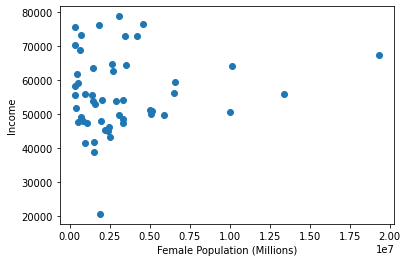

In [13]:
plt.scatter(us_census['Female Population'],us_census['Income'])
plt.xlabel('Female Population (Millions)')
plt.ylabel('Income')
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [14]:
print(us_census.columns) # The column names for each race are within the [2:8] index
races = us_census.columns[2:8]
# Checking for nan in the race columns
for race in races:
    print(us_census[race].isna().value_counts())
# Pacific is the only column with nan values

# Need to convert each column to int type first
for race in races:
    race_split = us_census[race].str.split('%')
    us_census[race] = pd.to_numeric(race_split.str.get(0))
    
# Checking to see what the total race percentages are to get a better idea what the Pacific nans should be
# Ignoring the rows with nan in the Pacific columns
temp = us_census.dropna()
total = temp['Hispanic']+temp['White']+temp['Black']+temp['Native']+temp['Asian']+temp['Pacific']
print(total.value_counts())
print(total.mean())

# Hmmm. Not sure what the best course of action here is. I think that I will repalce the nans in the Pacific columns
# with a percentage that is the difference between the total.mean() and the sum of the other races in that row.
# This way the mean remains the same.

us_census = us_census.fillna(value={
    'Pacific': total.mean() - (us_census['Hispanic']+us_census['White']+us_census['Black']+us_census['Native']+us_census['Asian'])})

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Male Population', 'Female Population'],
      dtype='object')
False    51
Name: Hispanic, dtype: int64
False    51
Name: White, dtype: int64
False    51
Name: Black, dtype: int64
False    51
Name: Native, dtype: int64
False    51
Name: Asian, dtype: int64
False    47
True      4
Name: Pacific, dtype: int64
98.14    3
98.41    1
99.83    1
98.22    1
97.94    1
98.26    1
97.62    1
97.92    1
97.59    1
93.08    1
96.51    1
98.08    1
97.01    1
98.08    1
98.29    1
97.64    1
98.17    1
98.39    1
98.01    1
97.19    1
95.60    1
97.99    1
96.84    1
97.82    1
92.57    1
97.96    1
97.95    1
97.00    1
97.80    1
97.66    1
98.13    1
81.76    1
97.96    1
98.19    1
98.33    1
97.75    1
98.07    1
98.37    1
98.05    1
97.40    1
97.32    1
97.56    1
97.50    1
98.91    1
98.11    1
dtype: int64
97.30340425531914


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

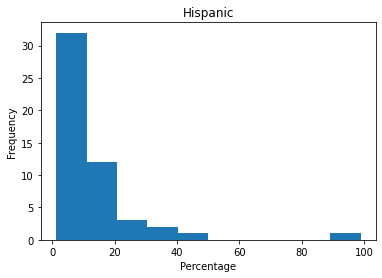

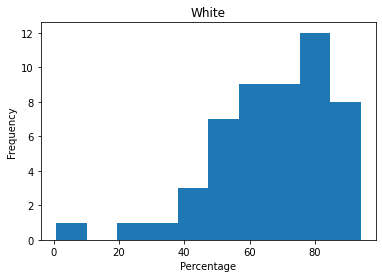

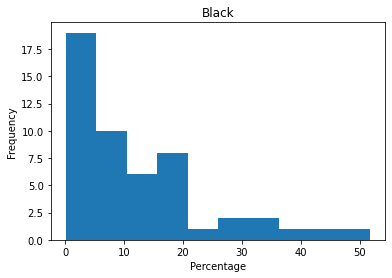

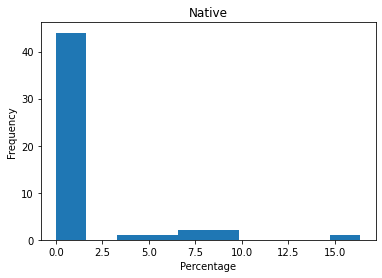

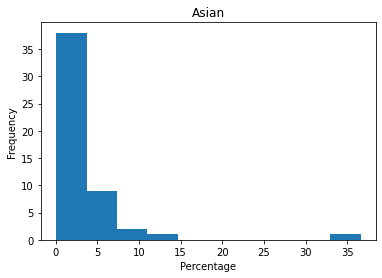

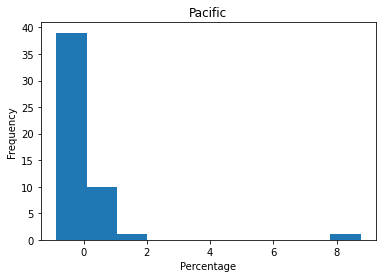

In [15]:
# Let's make the histograms

for race in races:
    plt.hist(us_census[race])
    plt.title(race)
    plt.xlabel('Percentage')
    plt.ylabel('Frequency')
    plt.show()